# Regression Model to determine influence of artist's gender on the topics generated by BERTopic

In [ ]:
from google.colab import drive
import os

# gdrive_path='/content/gdrive/MyDrive/Bertopic/shared_work/'

# # This will mount your google drive under 'MyDrive'
# drive.mount('/content/gdrive', force_remount=True)
# # In order to access the files in this notebook we have to navigate to the correct folder
# os.chdir(gdrive_path)
# dataset_path = ''
# # Check manually if all files are present
# print(sorted(os.listdir()))

# # To run from the common drive:
# # dataset_path = '/content/drive/MyDrive/Praktikum - NLP Applications/Models/bertopic_concatenated_chunks_stratified'
# # drive.mount('/content/drive', force_remount=True)

Mounted at /content/gdrive
['BERTopic.ipynb', 'BERTopic_female.ipynb', 'Data-PreProcessing.ipynb', 'Dataset_Statistics.ipynb', 'Regression.ipynb', 'Regression_RapSubset.ipynb', 'betti2023_weat_wordsets.csv', 'chunk_5.csv', 'chunk_6.csv', 'concatenated_chunks.csv', 'genius_with_artists_first_chunk.csv', 'glove.6B.100d.txt', 'glove.6B.100d.txt.word2vec', 'glove.6B.200d.txt', 'glove.6B.300d.txt', 'glove.6B.50d.txt', 'glove.6B.zip', 'model', 'model_new', 'my_model', 'mymodel', 'scweat_analysis (1).ipynb', 'topics.json', 'topics.pkl', 'topics_for_bias_analysis.csv', 'updated_artists_with_gender_lyrics.csv', 'wasabi_artist_new_dartists.csv', 'wasabi_english_songs.csv', 'wasabi_new_dartists_balanced.csv', 'wasabi_new_songs_english_balanced_artists.csv', 'weat_results.csv']


In [ ]:
import pandas as pd
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer
# from bertopic import BERTopic
# from umap import UMAP

# set path of the file
csv_file_path = 'topics_for_bias_analysis.csv'
df = pd.read_csv(dataset_path + csv_file_path)

In [ ]:
dataset = df[['genre', 'year', 'gender', 'topic', 'topic_label', 'topic_prob']]

In [ ]:
dataset.describe()

,year,topic,topic_prob
count,537553.000000,537553.000000,537553.000000
mean,2002.695682,165.225821,0.684348
std,23.488690,156.126712,0.093572
min,1.000000,-1.000000,0.050249
25%,1996.000000,28.000000,0.630626
50%,2008.000000,110.000000,0.693565
75%,2015.000000,269.000000,0.746582
max,2023.000000,541.000000,0.995553


In [ ]:
# Converting year to decade
dataset['year'].unique()

array([2004, 1998, 2002, 2009, 2000, 2006, 2010, 2011, 2003, 2014, 2007,
       2005, 1999, 2013, 2015, 2008, 2001, 2020, 2012, 2016, 2019, 1995,
       1994, 1997, 1993, 2017, 1992, 1996, 1988, 1990, 1991, 1960, 2018,
       1989, 1965, 1975, 1962, 1974, 1964, 1963, 1976, 1966, 1967, 1985,
       1979, 1986, 1961, 1981, 1980, 1978, 1969, 1970, 1971, 1968, 1973,
       1983, 1987, 1972, 1977, 1982, 2022, 1984, 2021, 1956,    1, 1950,
       1953, 1951, 1949, 1958, 1955, 1957, 1946, 1959, 1954, 1952, 1945,
       1948, 1947, 1939, 1871, 1876, 1865, 1415, 2023, 1770, 1944, 1855,
       1936,   15, 1814, 1759, 1785, 1788, 1789, 1791, 1782, 1929, 1938,
       1926, 1931, 1776, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808,
       1940, 1941, 1932, 1933, 1943, 1942,    2,  699, 1861, 1937, 1935,
       1934, 1862, 1918, 1919, 1917, 1930, 1517, 1790, 1787, 1928, 1927,
       1895, 1907, 1911, 1925, 1906, 1904, 1923,   79, 1864, 1847, 1921,
       1741, 1920, 1905, 1870, 1924, 1922, 1739, 17

In [ ]:
# Number of songs with year < 1950 - a few of these are from the 18th and 19th centuries but there are also some mistagged songs

print(len(dataset[dataset['year'] < 1950])) # => 2856, only 0.5% of the data so these are ignored
dataset = dataset[dataset['year'] >= 1950]

def get_decade(year):
  if year >= 2000 and year < 2010:
    decade = '2000s'
  else:
    decade = str(year//100) + str(year%100)[0] + '0s'
  return decade

dataset['decade'] = dataset['year'].apply(get_decade)

2856


In [ ]:
# Number of outliers

len(df[df['topic'] == -1])

8598

In [ ]:
dataset = dataset[dataset['topic'] != -1]
dataset = dataset[dataset['genre'] == 'rap']
top10topics = dataset['topic'].value_counts().nlargest(10).to_dict()
dataset['decade'] = dataset['year'].apply(get_decade)
mask = dataset['topic'].isin(top10topics)
top10 = dataset[mask]

In [ ]:
# Counting the number of entries with gender as 'male'
male_count = top10[top10['gender'] == 'Male'].shape[0]

print(f"Number of entries with gender male: {male_count}")

# Counting the number of entries with gender as 'Female'
Female_count = top10[top10['gender'] == 'Female'].shape[0]

print(f"Number of entries with gender Female: {Female_count}")

Number of entries with gender male: 54474
Number of entries with gender Female: 2389


In [ ]:
selected_decade = '1970s'
# Filter the dataset for the selected decade
decade_data = top10[top10['decade'] == selected_decade]

# Get the topics for the selected decade
decade_topics = decade_data['topic']

# You can print or analyze the topics as needed, for example:
print(f"Topics from the {selected_decade}:")
print(decade_topics.value_counts())


Topics from the 1970s:
7      6
261    1
101    1
Name: topic, dtype: int64


In [ ]:
selected_decade = '1980s'
# Filter the dataset for the selected decade
decade_data = top10[top10['decade'] == selected_decade]

# Get the topics for the selected decade
decade_topics = decade_data['topic']

# You can print or analyze the topics as needed, for example:
print(f"Topics from the {selected_decade}:")
print(decade_topics.value_counts())


Topics from the 1980s:
0      151
101     55
7       43
98      25
261     22
357     18
272     16
2       14
66       9
398      6
Name: topic, dtype: int64


In [ ]:
selected_decade = '1990s'
# Filter the dataset for the selected decade
decade_data = top10[top10['decade'] == selected_decade]

# Get the topics for the selected decade
decade_topics = decade_data['topic']

# You can print or analyze the topics as needed, for example:
print(f"Topics from the {selected_decade}:")
print(decade_topics.value_counts())


Topics from the 1990s:
0      3797
98      629
101     236
261     212
66      182
2       149
7       146
272     144
398     100
357      83
Name: topic, dtype: int64


In [ ]:
selected_decade = '2000s'
# Filter the dataset for the selected decade
decade_data = top10[top10['decade'] == selected_decade]

# Get the topics for the selected decade
decade_topics = decade_data['topic']

# You can print or analyze the topics as needed, for example:
print(f"Topics from the {selected_decade}:")
print(decade_topics.value_counts())


Topics from the 2000s:
0      10385
98      1435
101      774
261      749
2        594
66       587
272      504
398      450
7        393
357      391
Name: topic, dtype: int64


In [ ]:
selected_decade = '2010s'
# Filter the dataset for the selected decade
decade_data = top10[top10['decade'] == selected_decade]

# Get the topics for the selected decade
decade_topics = decade_data['topic']

# You can print or analyze the topics as needed, for example:
print(f"Topics from the {selected_decade}:")
print(decade_topics.value_counts())


Topics from the 2010s:
0      19037
98      1932
261     1643
66      1579
101     1348
272     1309
357     1202
398     1164
2        978
7        685
Name: topic, dtype: int64


In [ ]:
selected_decade = '2020s'
# Filter the dataset for the selected decade
decade_data = top10[top10['decade'] == selected_decade]

# Get the topics for the selected decade
decade_topics = decade_data['topic']

# You can print or analyze the topics as needed, for example:
print(f"Topics from the {selected_decade}:")
print(decade_topics.value_counts())


Topics from the 2020s:
0      1974
261     305
101     225
98      213
66      193
7       189
398     162
2       158
357     141
272     119
Name: topic, dtype: int64


In [ ]:
top10_X = top10[['decade', 'gender']]
top10_y = top10['topic']

In [ ]:
top10_y.unique()

array([  7,   0, 398, 272,  98, 261, 357, 101,  66,   2])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(top10_X, top10_y, test_size=0.2, random_state=42)

In [ ]:
len(top10_y.unique())

10

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define a set of parameters for tuning
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l1', 'l2'],  # Type of penalty
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Optimization algorithms
# }
# # Create the Logistic Regression model
# model = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')

# # Create GridSearchCV with the model and parameter grid
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # The best hyperparameters from GridSearchCV
# print("Best Parameters: ", grid_search.best_params_)

# # Use the best model
# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)
# # Make predictions with the best model
# y_hat = best_model.predict(X_test)
# accuracy_score(y_hat, y_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(top10_X, top10_y, test_size=0.2, random_state=42)

# le = LabelEncoder()
cat = OneHotEncoder()
# cat_dec = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat, ['decade', 'gender'])
])
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='saga',penalty= 'l1', max_iter=10000)

In [ ]:
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_hat, y_test)

0.616196254286468

In [ ]:
import numpy as np

# Retrieve the model's coefficients for all classes
coefficients = model.coef_

# Calculate the average of the absolute values of the coefficients for each feature across all classes
mean_coefficients = np.mean(np.abs(coefficients), axis=0)

# Get feature names after OneHotEncoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['decade', 'gender'])

# Match averaged coefficients with feature names
feature_importance_dict = dict(zip(feature_names, mean_coefficients))

# Print sorted by absolute importance
sorted_importances = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")

# note: this code gives the importance of each feature, regardless of each class
# the coefficient here are all kinds positive because it is accross all classes, so more or less every feature would contribute if you every it out

decade_1970s: 0.39963533692426234
gender_Female: 0.3657609452924684
decade_1980s: 0.35252289643508117
decade_1990s: 0.29466262153201334
decade_2010s: 0.18784526272243565
decade_2000s: 0.17511085671430074
gender_Male: 0.1054511615607218
decade_2020s: 0.09770827424977169


Positive Coefficients (Positive Influence):

A positive coefficient for a feature (like a specific decade or gender) means that the presence of this feature increases the probability of the model predicting a particular topic.
For example, if decade_1990s has a positive coefficient for Topic 3, it suggests that when a data point is from the 1990s, it is more likely to be
classified as Topic 3 compared to other topics.

Negative Coefficients (Negative Influence):
Conversely, a negative coefficient means that the feature decreases the probability of the model predicting a certain topic.
For instance, if decade_1970s has a negative coefficient for Topic 5, it implies that data points from the 1970s are less likely to be classified as Topic 5.

In [ ]:
# Retrieve the model's coefficients for all classes
coefficients = model.coef_

# Get feature names after OneHotEncoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['decade', 'gender'])

# Extract unique class names (topics) from y_train
class_names = y_train.unique()
class_names.sort()  # Sorting to ensure the order matches the class indices

# Step 1: Create the mapping dictionary
topic_to_label = dict(zip(df['topic'], df['topic_label']))
# Removing duplicates
topic_to_label = {k: v for k, v in topic_to_label.items() if pd.notnull(k)}


# Ensure the number of class names matches the number of classes in the model
assert len(class_names) == coefficients.shape[0], "Number of class names does not match number of classes"

for class_index in range(len(class_names)):
    # Get the coefficients for this class
    class_coefficients = coefficients[class_index]

    # Match coefficients with feature names for this class
    feature_importance_dict = dict(zip(feature_names, class_coefficients))

    # Get the topic label for the current class index
    topic_label = topic_to_label.get(class_names[class_index])

    # Print sorted by absolute importance
    sorted_importances = sorted(feature_importance_dict.items(), key=lambda item: abs(item[1]), reverse=True)

    print(f"Feature Importances for Topic '{class_names[class_index]}', '{topic_label}':")
    for feature, importance in sorted_importances:
        print(f"{feature}: {importance}")
    print("\n")

Feature Importances for Topic '0', 'nigga_niggas_bitch':
decade_1970s: -0.9720534097785222
decade_1990s: 0.7762787283980699
decade_2000s: 0.5074333690093304
decade_2010s: 0.23576051144664442
gender_Male: 0.20201369445815426
decade_1980s: -0.19262368157914675
decade_2020s: 0.0
gender_Female: 0.0


Feature Importances for Topic '2', 'body_girl_baby':
gender_Male: -0.6472224429444747
gender_Female: 0.48845322076837727
decade_2000s: 0.22624114913101567
decade_2010s: -0.1372688577150154
decade_1990s: 0.09266710419823473
decade_1980s: -0.005857962867767516
decade_1970s: 0.0
decade_2020s: 0.0


Feature Importances for Topic '7', 'mi_dem_yuh':
decade_1970s: 3.0242999594641016
decade_1980s: 0.8930548132340834
decade_2010s: -0.723508470056118
decade_2000s: -0.39036531214403114
gender_Male: -0.1889658840645494
decade_1990s: -0.13358962864865356
decade_2020s: 0.0
gender_Female: 0.0


Feature Importances for Topic '66', 'ra_viral_body body':
gender_Female: 0.527625820061146
decade_1980s: -0.4800670

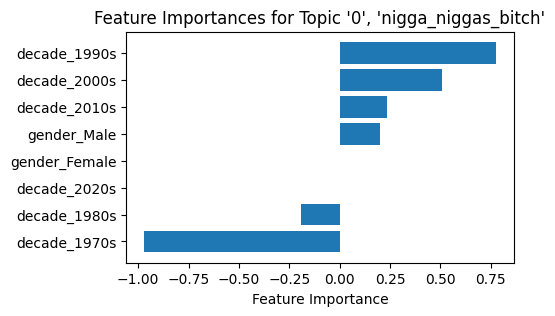

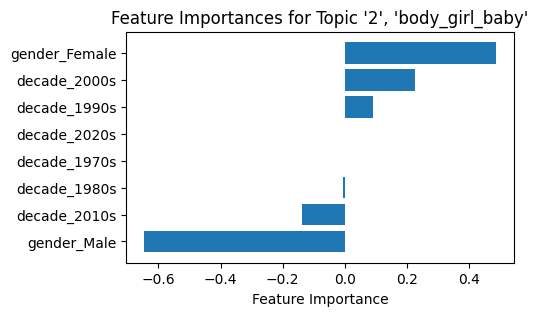

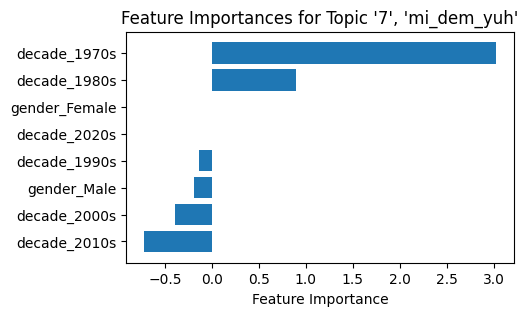

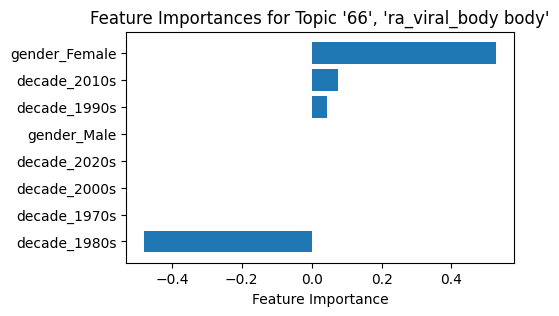

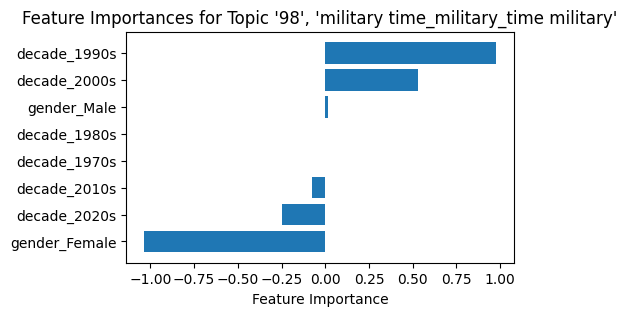

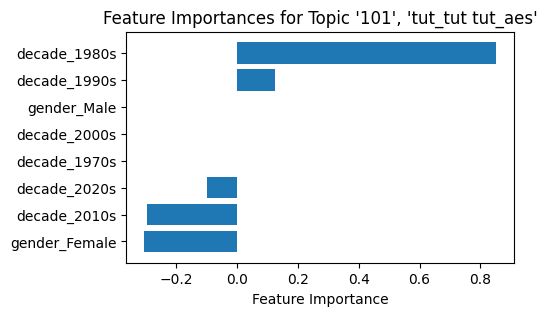

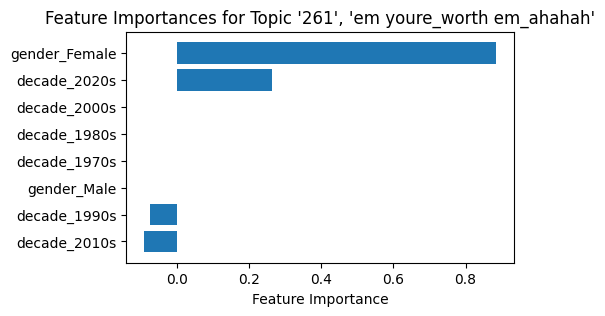

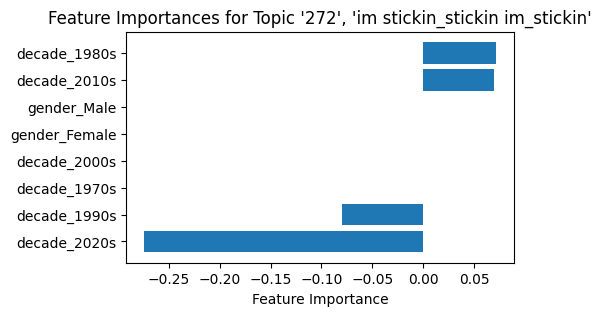

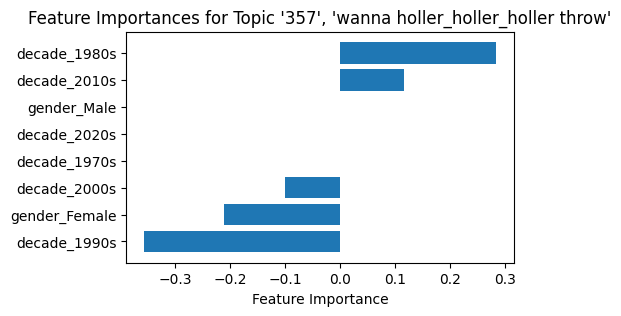

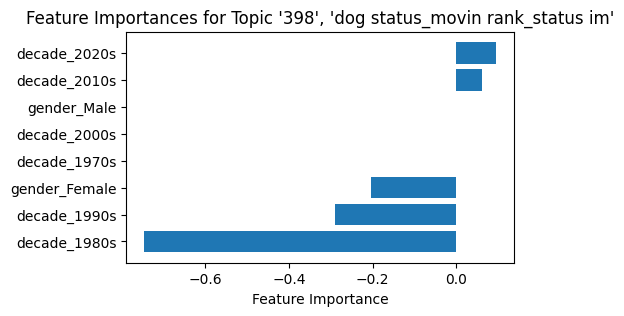

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already retrieved the feature importances and class names

# Function to create a bar chart for feature importances
def plot_feature_importances(importances, names, title, top_n=10):
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Get the top 'top_n' feature names and importances
    top_feature_names = [names[i] for i in indices[:top_n]]
    top_importances = [importances[i] for i in indices[:top_n]]

    # Create a horizontal bar chart
    plt.figure(figsize=(5, 3))
    plt.barh(range(top_n), top_importances, align='center')
    plt.yticks(range(top_n), top_feature_names)
    plt.xlabel('Feature Importance')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
    plt.show()

# Loop through each class (topic) and plot feature importances
for class_index in range(len(class_names)):
    class_coefficients = coefficients[class_index]
    feature_importance_dict = dict(zip(feature_names, class_coefficients))
    topic_label = topic_to_label.get(class_names[class_index])

    # Set top_n to the number of features or a smaller value if desired
    top_n = min(10, len(feature_importance_dict))

    plot_feature_importances(
        importances=list(class_coefficients),  # Use the coefficients directly
        names=feature_names,
        title=f"Feature Importances for Topic '{class_names[class_index]}', '{topic_label}'",
        top_n=top_n
    )


# General Observations:
Male Dominance: There are significantly more entries for males (54,474) compared to females (2,389), indicating a male-dominated dataset. This imbalance can influence the model's learning and its generalization ability.

**Topic-Specific Analysis:**

Topic '0', 'nigga_niggas_bitch':

1970s Negative Influence: Strong negative coefficient, indicating lower association with this topic in the 1970s.
1990s and 2000s Positive Influence: Strong positive coefficients, suggesting a high association with the 1990s and 2000s.

Topic '2', 'body_girl_baby':

Gender Influence: Strong negative coefficient for males and positive for females, indicating a strong gender-specific influence on this topic.
2000s Positive Influence: Suggests a higher likelihood of this topic being relevant in the 2000s.

Topic '7', 'mi_dem_yuh':

1970s and 1980s Positive Influence: Strongly associated with these decades.
2000s and 2010s Negative Influence: Lower association in these later decades.

Topic '66', 'ra_viral_body body':

1980s Negative Influence: Indicates a lower association with the 1980s.
Gender Influence: Negative coefficient for males, suggesting lower association with male entries.

Topic '98', 'military time_military_time military':

1990s and 2000s Positive Influence: Strong association with these decades.
Gender Female Negative Influence: Indicates a lower association with female entries.

Topic '101', 'tut_tut tut_aes':

1980s Positive Influence: Indicates a strong association with the 1980s.
2010s Negative Influence: Lower association in this decade.

Topic '261', 'em youre_worth em_ahahah':

Gender Female Positive Influence: Strong association with female entries.
2020s Positive Influence: Indicates relevance in the 2020s.

Topic '272', 'im stickin_stickin im_stickin':

1980s Positive Influence: Suggests an association with the 1980s.
2020s Negative Influence: Lower relevance in the 2020s.

Topic '357', 'wanna holler_holler_holler throw':

1980s Positive Influence: Indicates a strong association with the 1980s.
1990s Negative Influence: Lower association with the 1990s.

Topic '398', 'dog status_movin rank_status im':

1980s Negative Influence: Lower association with the 1980s.
2020s Positive Influence: Suggests increasing relevance in the 2020s.


Overall Insights:
The influence of decades varies significantly across topics, indicating that certain themes or subjects are more prevalent or relevant in specific time periods.
Gender plays a crucial role in several topics, particularly where there is a stark difference in the coefficients for male and female. This suggests certain topics may be more closely associated with one gender over the other in the dataset.
The large imbalance in the number of male and female entries could be skewing these results. It is essential to consider the potential impact of this imbalance on the model's ability to learn nuanced differences between genders across topics.

# Decade Analysis:

Overview of Topic Distribution
Dominant Topics: Topic '0' is overwhelmingly the most prevalent across all decades, particularly from the 1990s onward.
Decadal Shifts: Other topics (e.g., '98', '101', '261', '66') also show significant presence, but their distribution varies by decade, suggesting shifts in thematic focus over time.
Analysis by Decade and Topic

1970s:

Limited data, with only a few occurrences of topics '7', '261', and '101'.
The negative coefficient for this decade in some topics could indicate less relevance or a distinct thematic difference from other decades.

1980s:

Diverse range of topics with '0', '101', and '7' being more prevalent.
The model's negative coefficient for '0' and positive for '101' and '7' in this decade align with their respective occurrences.

1990s:

Marked increase in the number of topics, particularly '0'.
Positive coefficients for this decade in several topics correlate with the high occurrences, indicating strong thematic ties.

2000s:

Continuation of the trend, with '0' still dominant and high occurrences of '98', '101', and '261'.
The model's positive coefficients for these topics in the 2000s reflect their high occurrence.


2010s:

Further increase in topic diversity and prevalence, especially for '0'.
The model's coefficients generally align with the high occurrences of these topics in the 2010s.



2020s:

Early indications of topic trends with '0' still leading.
The model's coefficients might not fully capture the emerging trends due to the proximity of the decade and possibly less data.

Key Insights:
Topical Evolution: There's a clear evolution in the prevalence and diversity of topics over time. The 1990s onwards show a significant increase in the variety and frequency of topics, suggesting a broadening of thematic focus.
Model Alignment: In many cases, the model's coefficients align with the occurrence of topics across decades, indicating its effectiveness in capturing decadal thematic trends.

Topic '0': Its dominant presence across all decades and positive coefficients in recent decades suggest a strong and growing thematic influence.
Gender Influence: For certain topics, gender-specific coefficients (positive for one gender and negative for the other) reveal gendered associations with specific themes, reflecting cultural or societal patterns.




In [ ]:
parameters = model.get_params()
parameters

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
coefficients = model.coef_
coefficients

array([[-9.72053410e-01, -1.92623682e-01,  7.76278728e-01,
         5.07433369e-01,  2.35760511e-01,  0.00000000e+00,
         0.00000000e+00,  2.02013694e-01],
       [ 0.00000000e+00, -5.85796287e-03,  9.26671042e-02,
         2.26241149e-01, -1.37268858e-01,  0.00000000e+00,
         4.88453221e-01, -6.47222443e-01],
       [ 3.02429996e+00,  8.93054813e-01, -1.33589629e-01,
        -3.90365312e-01, -7.23508470e-01,  0.00000000e+00,
         0.00000000e+00, -1.88965884e-01],
       [ 0.00000000e+00, -4.80067056e-01,  4.32776677e-02,
         0.00000000e+00,  7.50724397e-02,  0.00000000e+00,
         5.27625820e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  9.76948362e-01,
         5.27612816e-01, -7.34828026e-02, -2.45672799e-01,
        -1.03724727e+00,  1.63095662e-02],
       [ 0.00000000e+00,  8.51363673e-01,  1.24212510e-01,
         0.00000000e+00, -2.94207270e-01, -9.86690014e-02,
        -3.05187349e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.000000

In [ ]:
#extracting the feature weight for gender varaible

model.fit(X_train, y_train)

# Get the feature names after OneHotEncoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Find the column indices for the 'gender' feature
gender_feature_indices = [i for i, feature in enumerate(feature_names) if 'gender' in feature]

# Extract the coefficients for the 'gender' feature from the model
gender_coefficients = model.coef_[:, gender_feature_indices]

# Print the gender coefficients
print(gender_coefficients)


[[ 0.          0.20134359]
 [ 0.35902979 -0.77730114]
 [ 0.         -0.19002027]
 [ 0.04131534 -0.48691202]
 [-1.05292469  0.        ]
 [-0.30452355  0.        ]
 [ 0.62095185 -0.26434308]
 [ 0.          0.        ]
 [-0.20982571  0.        ]
 [-0.20322085  0.        ]]


Improvement on regression model: hyper parameter tuning


In [ ]:
# Print the number of unique classes
print("Number of unique classes:", len(top10_y.unique()))

# Print the count of instances in each class
print("Count of instances in each class:\n", top10_y.value_counts())


Number of unique classes: 10
Count of instances in each class:
 0      35344
98      4234
261     2932
101     2639
66      2550
272     2092
2       1893
398     1882
357     1835
7       1462
Name: topic, dtype: int64


In [ ]:
# # Extracting the coefficients
# coefficients = best_model.coef_
# coefficients

# # Mapping coefficients to feature names
# coef_dict = dict(zip(feature_names, coefficients))

# # Extract and analyze coefficients related to 'gender'
# gender_coefs = {k: v for k, v in coef_dict.items() if 'gender' in k}
# print(gender_coefs)

# # Further steps would be to evaluate the model and interpret these coefficients.